In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import lab.torch as B
import torch

/homes/mojb2/Thesis/GI-PVI/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from toy_regression import generate_data, generate_data2, generate_test_data

2022-06-02 09:37:07,567 - gi.utils.pytorch_setup - INFO - CUDA available - Lab/PyTorch will use GPU


In [4]:
# Lab variable initialization
B.default_dtype = torch.float64
key = B.create_random_state(B.default_dtype, seed=0)

key, x_tr, y_tr = generate_data(key, 100)
x_tr = x_tr.cpu()
y_tr = y_tr.cpu()

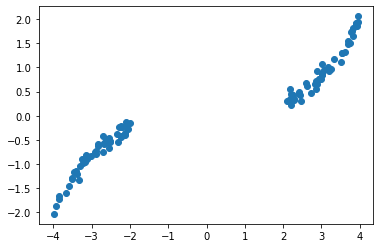

In [5]:
plt.scatter(x=x_tr, y=y_tr)

In [18]:
key, x_te, y_te = generate_test_data(key, 100)
x_te = x_te.cpu()
y_te = y_te.cpu()

tensor(0.5333, device='cuda:0', dtype=torch.float64)


<function matplotlib.pyplot.show(close=None, block=None)>

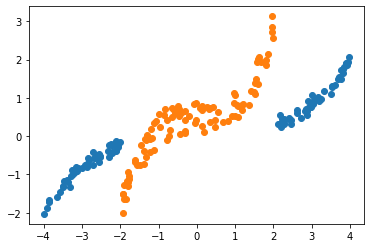

In [19]:
plt.scatter(x=x_tr, y=y_tr)
plt.scatter(x=x_te, y=y_te)
plt.show

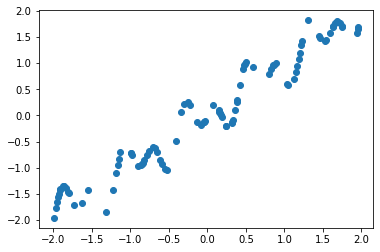

In [8]:
key, x2, y2 , e1, e2 = generate_data2(key, 100, -2, 2)
x2 = x2.cpu()
y2 = y2.cpu()
e1 = e1.cpu()
e2 = e2.cpu()

plt.scatter(x2, y2)
plt.show()